# Simple example

## Create the pipeline

The example application is based on a pipeline to analyse online news media. It runs using pipemaker but uses minimal, dummy functions for illustration of pipemaker. The real application on which it was based is "compass" which can be installed separately if required.

In [1]:
# notebook settings
from pipemaker.utils.ipstartup import *
import shutil

# pipemaker package
from pipemaker.master import env, pipeline as p

# example application
from pipemaker import example
from pipemaker.example import *

[root:INFO]:importing pipemaker (__init__.py:13, time=Jan-07 14:58)


In [12]:
p.close()
p.start()

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)
[root:INFO]:shutting down flask (view.py:111, time=Jan-07 15:00)
[root:INFO]:loading database connection (db.py:14, time=Jan-07 15:00)
[root:INFO]:starting everything (pipeline.py:78, time=Jan-07 15:00)
[root:INFO]:shutting down flask (view.py:111, time=Jan-07 15:00)
[root:INFO]:loading database connection (db.py:14, time=Jan-07 15:00)
[root:INFO]:starting workers Abby n=8 (workers.py:23, time=Jan-07 15:00)


time: 14.3 s


In [13]:
# reset the data so it runs from scratch
shutil.rmtree("pipedata", ignore_errors=True)

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


time: 4.53 ms


One line of code to create a pipeline from all the functions in the "example" module.

In [14]:
p.add(example)

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


time: 16 ms


Configure the job:

* All files from this run will be under pipedata/sun
* The web search will be carried out using the domain parameter

In [15]:
env.pathvars.job = "sun"
env.params.domain = "sun.co.uk"

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


time: 1 ms


One line of code shows the upstream pipeline for any task using the current "pipe" variables

* The pipeline has been created automatically linking inputs and outputs.
* Known parameters and existing files are shown in green.
* Missing parameters and files are shown in white.
* When we run a function it will automatically run the upstream pipeline to generate input files

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


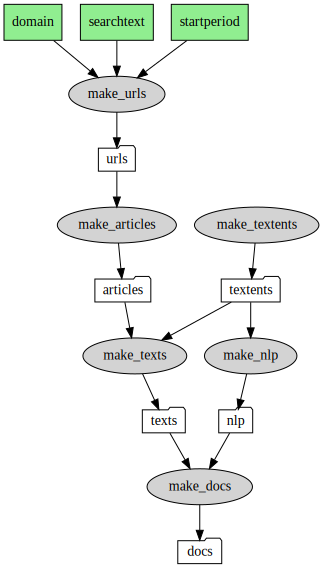

time: 145 ms


In [16]:
make_docs.view()

In [17]:
import json
print(json.dumps(p.dumps(), indent=4, sort_keys=True)
                                          .replace("{","")
                                          .replace("}","")
                                          .replace("\"", "")
                                          .replace(",", ""))

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)



    make_articles: 
        inputs: 
            urls: /pipedata/sun/urls.pkl
        
        output: /pipedata/sun/articles.pkl
    
    make_docents: 
        inputs: 
            docs: /pipedata/sun/docs.pkl
            media: /pipedata/sun/media.pkl
            textents: /pipedata/sun/textents.pkl
        
        output: /pipedata/sun/docents.pkl
    
    make_docs: 
        inputs: 
            nlp: /pipedata/sun/nlp.pkl
            texts: /pipedata/sun/texts.pkl
        
        output: /pipedata/sun/docs.pkl
    
    make_nlp: 
        inputs: 
            textents: /pipedata/sun/textents.pkl
        
        output: /pipedata/sun/nlp.pkl
    
    make_textents: 
        inputs: 
        output: /pipedata/sun/textents.pkl
    
    make_texts: 
        inputs: 
            articles: /pipedata/sun/articles.pkl
            textents: /pipedata/sun/textents.pkl
        
        output: /pipedata/sun/texts.pkl
    
    make_urls: 
        inputs: 
            domain: 'sun.co.uk'
  

## Run the pipeline

In [18]:
make_texts()

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/urls.pkl (taskmaker.py:101, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/articles.pkl (taskmaker.py:101, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/textents.pkl (taskmaker.py:101, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/texts.pkl (taskmaker.py:101, time=Jan-07 15:00)


'sun.co.uk=>urls=>articles=>texts'

time: 109 ms


If we now look at the pipeline we see only what remains to be run; files already created are in green; and the upstream functions that are already completed are no longer shown

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


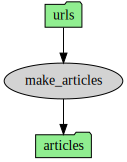

time: 88 ms


In [19]:
make_articles.view()

To see the full upstream pipeline set parents=True......which shows everything from "texts" upstream is green.

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


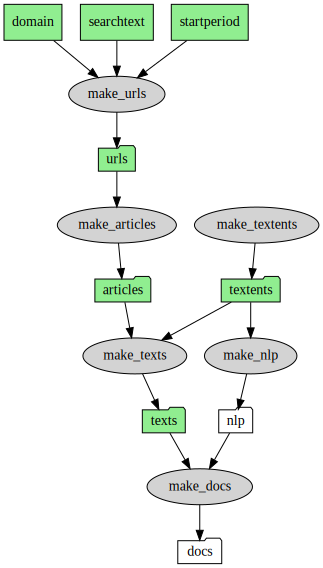

time: 110 ms


In [20]:
make_docs.view(parents=True)

We can load the contents of any item in green

In [21]:
p.load("articles")

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)


'sun.co.uk=>urls=>articles'

time: 4 ms


Now when we run make_docs it only needs to run the functions that have not already been successful.

In [22]:
make_docs()

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/nlp.pkl (taskmaker.py:101, time=Jan-07 15:00)
[root:INFO]:creating osfs:///pipedata/sun/docs.pkl (taskmaker.py:101, time=Jan-07 15:00)


'sun.co.uk=>urls=>articles=>texts=>docs'

time: 52 ms


Now the final output is green and complete

[cellevents:INFO]:starting (cellevents.py:43, time=Jan-07 15:01)


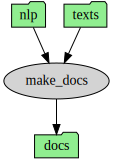

time: 77 ms


In [23]:
make_docs.view()